In [12]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
datadir = './data'

Populating the interactive namespace from numpy and matplotlib


# Plotting Subway Delay and Ridership Information
This notebook plots the relationship between ridership and subway delays on a per station basis for 2015.

## First, create a filter to only use Yonge-University-Spadina and Bloor-Danforth Stations

These are the two most used lines.

In [189]:
yus = ['downsview','wilson','yorkdale','lawrence west','glencairn','eglinton west','st clair west','dupont','spadina','st george','museum',"queen's park",'st patrick','osgoode','st andrew','union','king','queen','dundas','college','wellesley','bloor','rosedale','summerhill','st clair','davisville','eglinton','lawrence','york mills','sheppard','north york centre','finch']
bd = ['kipling','islington','royal york','old mill','jane','runnymede','high park','keele','dundas west','lansdowne','dufferin','ossington','christie','bathurst','spadina','st george','bay','yonge','sherbourne','castle frank','broadview','chester','pape','donlands','greenwood','coxwell','woodbine','main street','victoria park','warden','kennedy']
interchange = ['spadina','st george','bloor','yonge'] # bloor-yonge is just one interchange, but it has different names on each line

## Import Ridership Information

In [192]:
ridership = np.loadtxt('{0}/ridership_2015.csv'.format(datadir),delimiter=',',skiprows=3,dtype=str)
station = ridership[:,1]
totrain = ridership[:,2]
fromtrain = ridership[:,3]
total = ridership[:,4]

## Import Delay Code Information

In [251]:
delayinfo = np.loadtxt('{0}/delay_codes_2014-2017.csv'.format(datadir),delimiter=',',skiprows=1,dtype='str')

# Columns-> 0:date, 1:time, 2:day, 3:location, 4:code, 5:delay time, 6:train gap time, 7:train direction, 8:line, 9:vehicle number

# Mask for known codes and only the YUS and BD lines
mask = (delayinfo[:,8]!='SRT') & (delayinfo[:,9]!='SHP') & (delayinfo[:,4]!='XXXXX') & (delayinfo[:,4]!='XXXXXX')
delayinfo=delayinfo[mask]

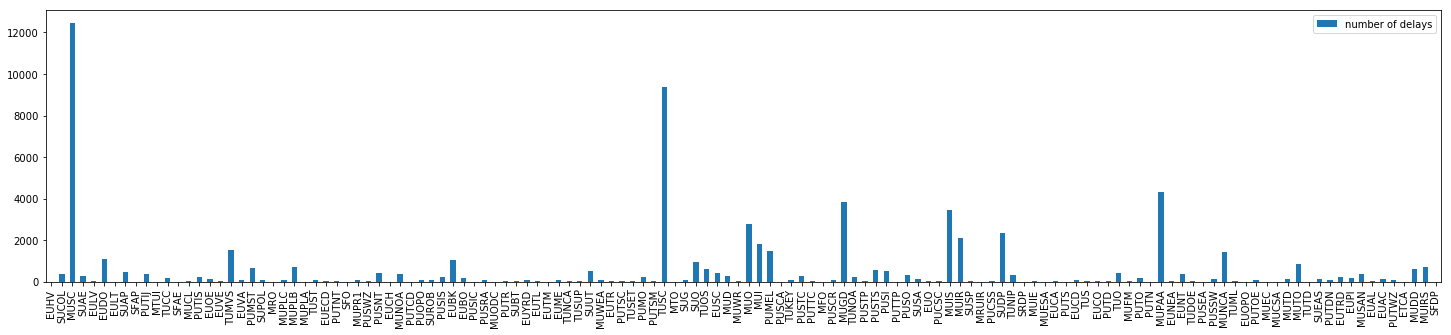

In [284]:
import pandas
from collections import Counter
code_counts = Counter(delayinfo[:,4])
df = pandas.DataFrame.from_dict(code_counts, orient='index')
df.columns=['number of delays']
df.plot(kind='bar',figsize=(25,5))

In [249]:
# Interpret delay codes
train = ['EUBO','EUAC','EUDO','EUTRD','MUODC','MUSAN','PUOPO','PUSCR','TUDOE','TUSET','TUST']
employee = ['EUME','EUOE','MUCL','MUESA','MUIE','MULD','MUNOA','MUTD','MUWR','SUAE','TUCC','TUMVS','TUNIP','TUNOA','TUOPO','TUOS','TUS','TUSC','TUSUP']
signals = ['PUCSC','PUCSS','PUSI','PUSIS','PUSNT','PUSO','PUSSW','PUSTS','PUSWZ','PUTSC']
track = ['EUHV','EULT','EULV','PUTD','PUTDN','PUTR','PUTS','PUTSM','PUTTC','PUTTP','PUTWZ']
station = ['PUMEL','PUMO','PUMST','SUCOL','SUEAS']
other_mech = ['EUAL','EUCH','EUCO','EUNEA','EUNT','EUO','EUOPO','EUPI','EUSC','EUTL','EUTM','EUTR','EUVA','EUVE','EUYRD','MUEC','MUFM','PUSCA','PUSRA','PUSTP','PUTCD','PUTNT','PUTO','PUTOE','TUKEY']
passenger = ['MUD','MUDD','MUI','MUIR','MUIRS','MUIS','MUPAA','MUPR1','SUAP','SUBT','SUDP','SUG','SUO','SUPOL','SUROB','SUSA','SUSP','SUUT']
weather = ['MUWEA','PUTIS']
misc = ['MUGD','MUO','MULPA','MUPLB','MUPLC','MUSC','MUTO','PUSEA','TUML','TUO']


In [194]:
def station_stack(stations,delayinfo,directions):
    totaldelays = np.zeros(len(stations))
    delays = {}
    loc = delayinfo[:,3]
    time = delayinfo[:,5]
    direc = delayinfo[:,7]
    for station in range(len(stations)):
        if stations[station] in interchange:
            inds = [i for i in range(len(loc)) if ((stations[station] in (loc[i]).lower()) & (direc[i] in directions))]
            weights = np.sqrt(time**2/np.sum(time**2))
            delays[stations[station]] = loc[inds]
            totaldelays[station] = 
        else:
            inds = [i for i in range(len(loc)) if stations[station] in (loc[i]).lower()]
            delays[stations[station]] = 
            totaldelays[station] = len(delays[stations[station]])
    return totaldelays

In [195]:
yus_delays = station_stack(yus,delayinfo,directions='NS')
bd_delays = station_stack(bd,delayinfo,directions='EW')

## Station Map Locations

In [225]:
NS_sep = 1
EW_sep = 1

turn = yus.index('union')
US_posy = np.arange(0,(turn)*NS_sep,NS_sep)[::-1]
US_posx = -EW_sep*np.ones(len(US_posy))
Y_posy = np.arange(0,(len(yus)-turn-1)*NS_sep,NS_sep)
Y_posx = EW_sep*np.ones(len(Y_posy))
NS_posy = np.concatenate((US_posy,-NS_sep*np.ones(1)))
NS_posy = np.concatenate((NS_posy,Y_posy))
NS_posx = np.concatenate((US_posx,np.zeros(1)))
NS_posx = np.concatenate((NS_posx,Y_posx))
NS_posy[0:(yus.index('spadina')+1)] -= NS_sep
NS_posx[0:(yus.index('spadina')+1)] -= EW_sep

EW_posx = np.arange(0,len(bd)*EW_sep,EW_sep)
EW_posy = np.zeros(len(EW_posx)) + (NS_posy[yus.index('spadina')])
EW_posx -= EW_posx[bd.index('bay')]

### Here's what the station map looks like

([], <a list of 0 Text yticklabel objects>)

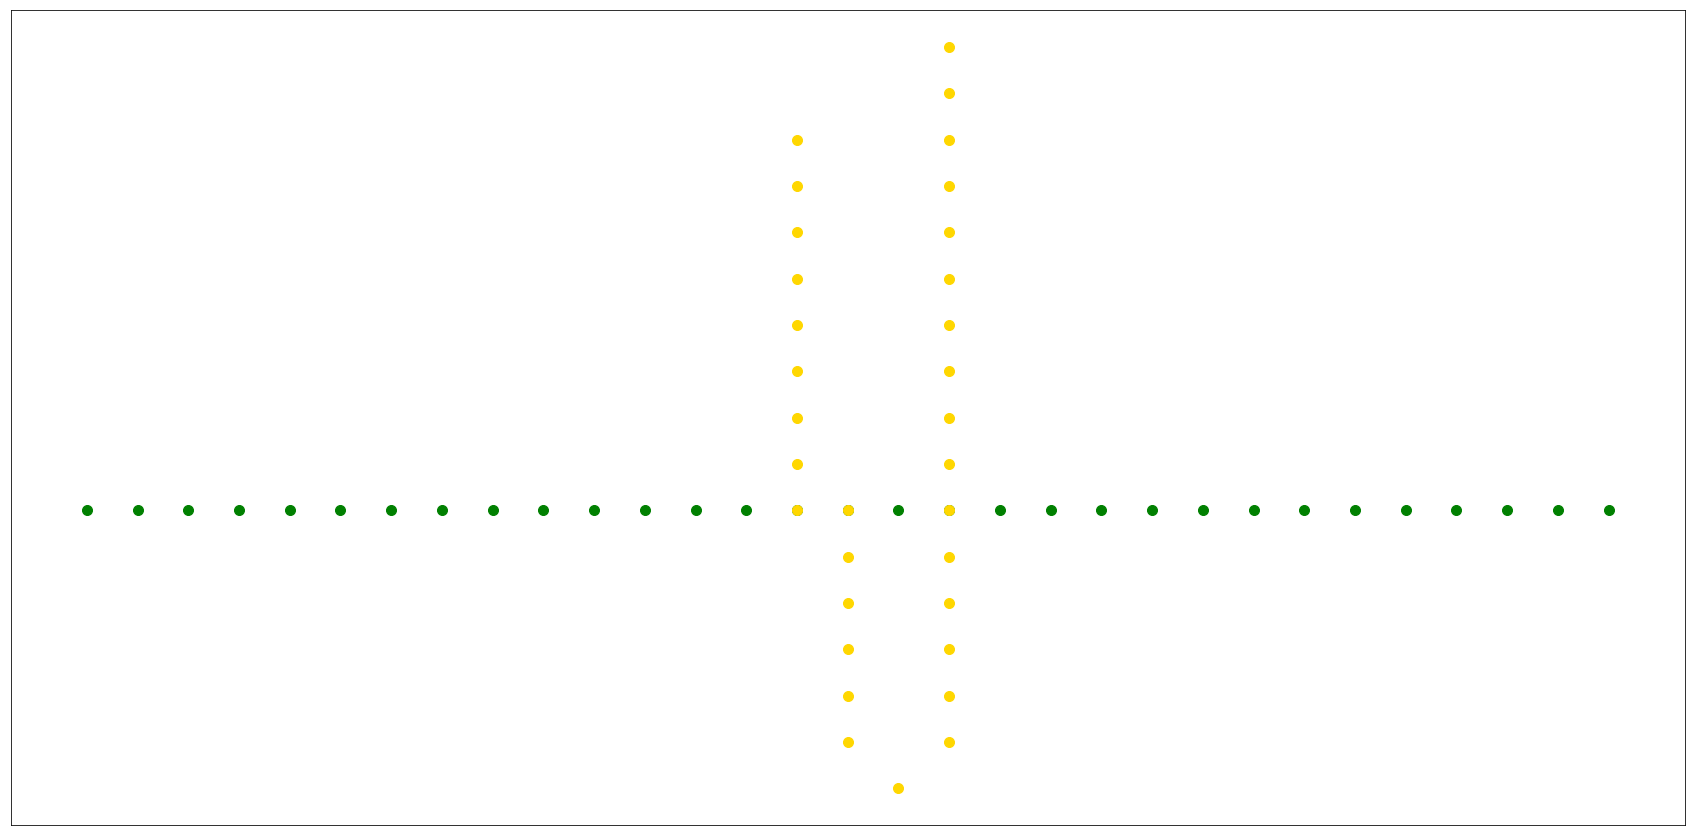

In [226]:
plt.figure(figsize=(30,15))
plt.plot(EW_posx,EW_posy,'o',color='g',markersize=10)
plt.plot(NS_posx,NS_posy,'o',color='gold',markersize=10)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

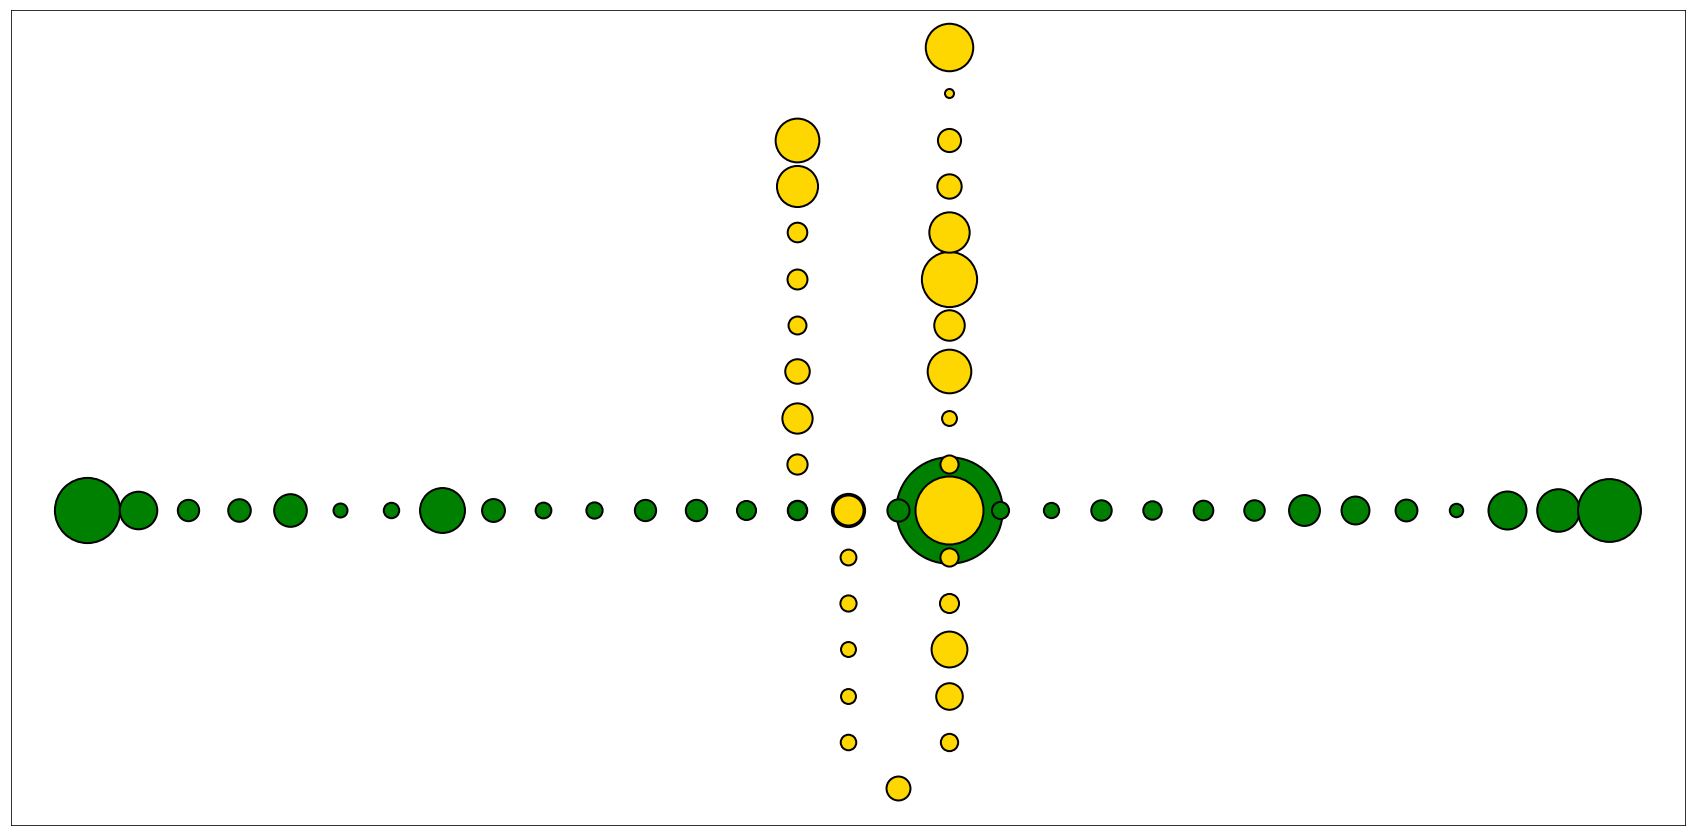

In [248]:
min_delay = np.min(np.concatenate((yus_delays,bd_delays)))
min_size = 8
edge = 2
plt.figure(figsize=(30,15))

bd_scaleddelays = bd_delays/min_delay

yus_scaleddelays = yus_delays/min_delay

# Do Interchanges First

# Spadina
station = 'spadina'
if yus_scaleddelays[yus.index(station)] > bd_scaleddelays[bd.index(station)]:
    plt.plot(NS_posx[yus.index(station)],NS_posy[yus.index(station)],'o',
             markersize=yus_scaleddelays[yus.index(station)]+min_size,color='gold',
             markeredgecolor='k',markeredgewidth=edge)
    plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)],'o',
             markersize=bd_scaleddelays[bd.index(station)]+min_size,color='g',
             markeredgecolor='k',markeredgewidth=edge)
elif yus_scaleddelays[yus.index(station)] <= bd_scaleddelays[bd.index(station)]:
    plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)],'o',
             markersize=bd_scaleddelays[bd.index(station)]+min_size,color='g',
             markeredgecolor='k',markeredgewidth=edge)
    plt.plot(NS_posx[yus.index(station)],NS_posy[yus.index(station)],'o',
             markersize=yus_scaleddelays[yus.index(station)]+min_size,color='gold',
             markeredgecolor='k',markeredgewidth=edge)
    
station = 'st george'
if yus_scaleddelays[yus.index(station)] > bd_scaleddelays[bd.index(station)]:
    plt.plot(NS_posx[yus.index(station)],NS_posy[yus.index(station)],'o',
             markersize=yus_scaleddelays[yus.index(station)]+min_size,color='gold',
             markeredgecolor='k',markeredgewidth=edge)
    plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)],'o',
             markersize=bd_scaleddelays[bd.index(station)]+min_size,color='g',
             markeredgecolor='k',markeredgewidth=edge)
elif yus_scaleddelays[yus.index(station)] <= bd_scaleddelays[bd.index(station)]:
    plt.plot(EW_posx[bd.index(station)],EW_posy[bd.index(station)],'o',
             markersize=bd_scaleddelays[bd.index(station)]+min_size,color='g',
             markeredgecolor='k',markeredgewidth=edge)
    plt.plot(NS_posx[yus.index(station)],NS_posy[yus.index(station)],'o',
             markersize=yus_scaleddelays[yus.index(station)]+min_size,color='gold',
             markeredgecolor='k',markeredgewidth=edge)
    
if yus_scaleddelays[yus.index('bloor')] > bd_scaleddelays[bd.index('yonge')]:
    plt.plot(NS_posx[yus.index('bloor')],NS_posy[yus.index('bloor')],'o',
             markersize=yus_scaleddelays[yus.index('bloor')]+min_size,color='gold',
             markeredgecolor='k',markeredgewidth=edge)
    plt.plot(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')],'o',
             markersize=bd_scaleddelays[bd.index('yonge')]+min_size,color='g',
             markeredgecolor='k',markeredgewidth=edge)
if yus_scaleddelays[yus.index('bloor')] <= bd_scaleddelays[bd.index('yonge')]:
    plt.plot(EW_posx[bd.index('yonge')],EW_posy[bd.index('yonge')],'o',
             markersize=bd_scaleddelays[bd.index('yonge')]+min_size,color='g',
             markeredgecolor='k',markeredgewidth=edge)
    plt.plot(NS_posx[yus.index('bloor')],NS_posy[yus.index('bloor')],'o',
             markersize=yus_scaleddelays[yus.index('bloor')]+min_size,color='gold',
             markeredgecolor='k',markeredgewidth=edge)

for station in range(len(bd_scaleddelays)):
    if bd[station] not in interchange:
        plt.plot(EW_posx[station],EW_posy[station],'o',markeredgecolor='k',markeredgewidth=edge,
                 markersize=bd_scaleddelays[station]+min_size,color='g')
        #plt.errorbar(EW_posx[station],EW_posy[station],yerr = bd_scaleddelays[station]/2.,
        #             fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='g')
        
for station in range(len(yus_scaleddelays)):
    if yus[station] not in interchange:
        plt.plot(NS_posx[station],NS_posy[station],'o',markeredgecolor='k',markeredgewidth=edge,
                 markersize=yus_scaleddelays[station]+min_size,color='gold')
        #plt.errorbar(NS_posx[station],NS_posy[station],xerr = yus_scaleddelays[station]/2.,
        #             fmt='o',markeredgecolor='k',markeredgewidth=edge,markersize = min_size,color='gold')
        


plt.xticks([])
plt.yticks([])